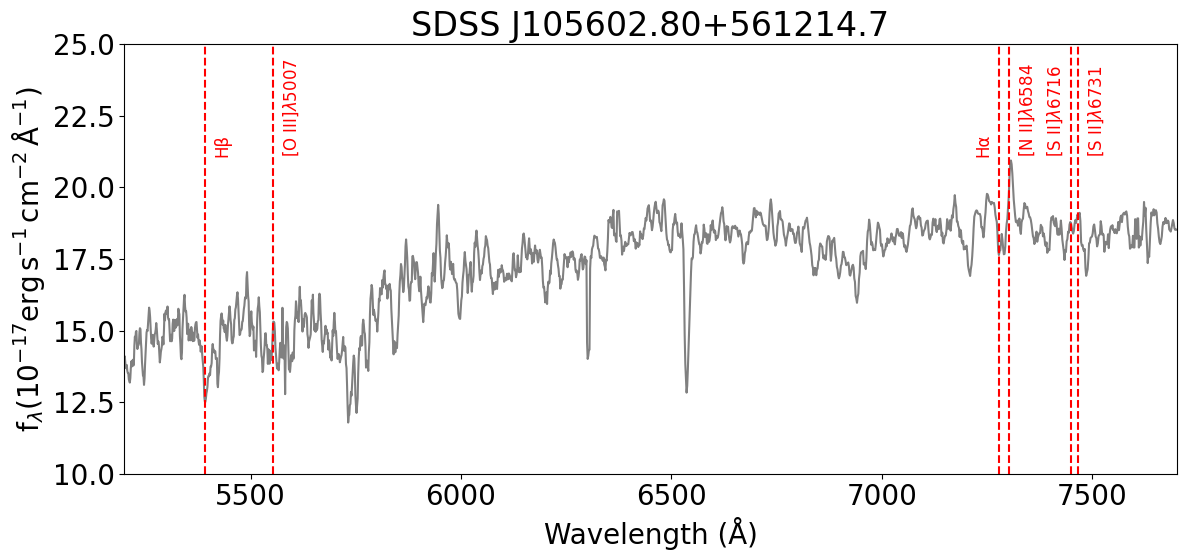

In [11]:
from astropy.io import fits

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

# Read FITS file (replace 'filename.fits' with your actual file path)
hdul = fits.open('spec-0907-52373-0501.fits')
data = hdul[1].data
wavelength = data['loglam']
flux = data['flux']

# Convert log wavelength to linear wavelength
wavelength = 10**wavelength

# smooth flux with a boxcar of 5 pixels
import numpy as np
from scipy.ndimage import uniform_filter1d
flux = uniform_filter1d(flux, size=5)

# redshift is 0.10906
redshift = 0.10906
# Define main emission lines (in Angstroms)
emission_lines = {
    'Hα': 6563 * (1 + redshift),
    'Hβ': 4861 * (1 + redshift),
    # r'[O II]$\lambda 3727$': 3727 * (1 + redshift),
    r'[O III]$\lambda 5007$': 5007 * (1 + redshift),
    r'[N II]$\lambda 6584$': 6584 * (1 + redshift),
    r'[S II]$\lambda 6716$': 6716 * (1 + redshift),
    r'[S II]$\lambda 6731$': 6731 * (1 + redshift)
}
# Plot spectrum
plt.figure(figsize=(12, 6))
plt.plot(wavelength, flux, "gray")

for line, wl in emission_lines.items():
    plt.axvline(wl, color='red', linestyle='--')
    # if line is Ha or SII, plot on the right side of the line
    if line in ['Hα', r'[S II]$\lambda 6716$']:
        # print text next to the top margin
        plt.text(wl - 60, max(flux) * 0.95, line, rotation=90, color='red', fontsize=12)
    else:
        plt.text(wl + 20, max(flux) * 0.95, line, rotation=90, color='red', fontsize=12)

plt.xlabel('Wavelength (Å)')
plt.ylabel(r'f$_\lambda(10^{-17} \mathrm{erg} \, \mathrm{s}^{-1} \, \mathrm{cm}^{-2} \, \mathrm{Å}^{-1})$')
plt.title('SDSS J105602.80+561214.7')
# plt.legend()
plt.xlim(5200,7700)
plt.ylim(10, 25)
plt.tight_layout()
plt.savefig('../../img/hfw_host_spectrum.png', dpi=300)
plt.show()
